In [85]:
# data manipulation
import pandas as pd
import numpy as np

# model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# plotting
import matplotlib.pyplot as plt

# saving
import joblib

In [71]:
X_train = joblib.load('data/X_train_preprocessed.pkl')
X_test = joblib.load('data/X_test_preprocessed.pkl')
y_train = joblib.load('data/y_train_preprocessed.pkl')
y_test = joblib.load('data/y_test_preprocessed.pkl')

In [72]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [73]:
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [74]:
param_grid = [
    {
        'metric': ['minkowski'],
        'p': [1, 2],  # hyperparametro usado apenas com a metrica minkowski
        'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
        'weights': ['uniform', 'distance']
    },
    {
        'metric': ['euclidean', 'manhattan'],
        'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
        'weights': ['uniform', 'distance']
    }
]

In [75]:
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=skf,
    scoring=scoring,
    refit='f1_macro',
    n_jobs=-1
)

In [76]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'metric': ['minkowski'],
                          'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
                          'p': [1, 2], 'weights': ['uniform', 'distance']},
                         {'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20],
                          'weights': ['uniform', 'distance']}],
             refit='f1_macro',
             scoring={'accuracy': 'accuracy',
                      'f1_macro': make_scorer(f1_score, response_method='predict', average=macro),
                      'precision_macro': make_scorer(precision_score, response_method='predict', average=macro),
                      'recall_macro': make_scorer(recall_score, response_method='predict', average=macro)})

In [77]:
grid_search.cv_results_

{'mean_fit_time': array([0.00941033, 0.00936215, 0.00830715, 0.00950761, 0.01016519,
        0.00850384, 0.01190839, 0.01156495, 0.00940418, 0.01000574,
        0.01026812, 0.0098556 , 0.01090302, 0.00755172, 0.00845845,
        0.00870862, 0.00870812, 0.00890326, 0.01345501, 0.01011314,
        0.00880599, 0.00990775, 0.01006169, 0.00920992, 0.01641042,
        0.01523831, 0.00871801, 0.01071541, 0.01185231, 0.0103549 ,
        0.00889971, 0.01017065, 0.0102515 , 0.01201715, 0.00979915,
        0.01135943, 0.01499896, 0.01075947, 0.01066456, 0.01072037,
        0.01217673, 0.01126716, 0.01085498, 0.01046293, 0.01655169,
        0.01210363, 0.01045814, 0.01086962, 0.01442831, 0.00991967,
        0.01541066, 0.00920913, 0.01317677, 0.00805938, 0.00841193,
        0.00947189, 0.01216269, 0.00841067, 0.00870266, 0.00785856,
        0.00920253, 0.00919948, 0.00719872, 0.00769854]),
 'std_fit_time': array([0.00111097, 0.00266532, 0.00110491, 0.00168061, 0.00205724,
        0.00120285, 0.005

In [83]:
results = pd.DataFrame(grid_search.cv_results_)
results = results[
    [
        'mean_fit_time', 'mean_score_time', 'param_metric', 'param_n_neighbors', 'param_p',
        'param_weights', 'mean_test_accuracy', 'mean_test_precision_macro', 'mean_test_recall_macro', 
        'mean_test_f1_macro', 'rank_test_accuracy', 'rank_test_precision_macro', 'rank_test_recall_macro', 
        'rank_test_f1_macro'
    ]
]
results = results.sort_values(by='mean_test_f1_macro', ascending=False)
pd.set_option('display.max_columns', None)
results.head(5)

,mean_fit_time,mean_score_time,param_metric,param_n_neighbors,param_p,param_weights,mean_test_accuracy,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro,rank_test_accuracy,rank_test_precision_macro,rank_test_recall_macro,rank_test_f1_macro
32,0.010251,0.124798,euclidean,1,NaN,uniform,0.847885,0.724178,0.725262,0.724494,55,55,1,1
2,0.008307,0.068744,minkowski,1,2.0,uniform,0.847885,0.724178,0.725262,0.724494,55,55,1,1
3,0.009508,0.071569,minkowski,1,2.0,distance,0.847885,0.724178,0.725262,0.724494,55,55,1,1
33,0.012017,0.068891,euclidean,1,NaN,distance,0.847885,0.724178,0.725262,0.724494,55,55,1,1
47,0.010870,0.078521,euclidean,20,NaN,distance,0.888470,0.920500,0.668159,0.717805,1,1,13,5


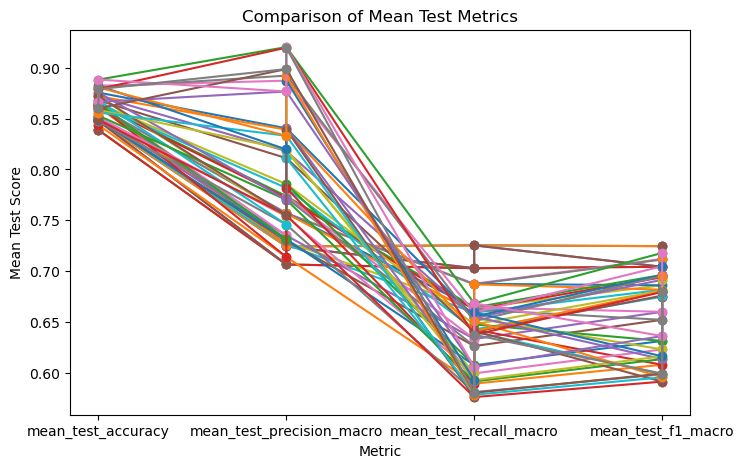

In [89]:
results_df = pd.DataFrame(grid_search.cv_results_)

# Let's pick the mean_test_* columns we want to compare
metrics = [
    "mean_test_accuracy",
    "mean_test_precision_macro",
    "mean_test_recall_macro",
    "mean_test_f1_macro"
]

#############################################
# (Optional) Filter to top models
#############################################
# For instance, select the 5 best models according to F1_macro
top_n = 5
results_top = results_df.nsmallest(top_n, "rank_test_f1_macro")

#############################################
# Melt the DataFrame to "long" format:
#############################################
# Identify any parameter columns you want in your plot label.
# E.g., 'param_n_neighbors', 'param_metric', 'param_p', 'param_weights', etc.
param_cols = ["param_n_neighbors", "param_metric", "param_weights"]
plot_df = results_df.melt(
    id_vars=param_cols,      # keep these columns "as is"
    value_vars=metrics,      # the columns we want to "unpivot"
    var_name="metric",       # new column with the metric name
    value_name="score"       # new column with the metric value
)

#############################################
# Plot each param setting (model) as its own line
#############################################
plt.figure(figsize=(8, 5))

# groupby the parameter combination so each unique combo is one line
for combo, group in plot_df.groupby(param_cols):
    # Create a label describing these parameters
    # e.g., combo = (3, "minkowski", "uniform")
    # Make a nice string:
    label_str = ", ".join(f"{col}={val}" for col, val in zip(param_cols, combo))
    
    # Plot the metric vs. score
    # 'metric' will be the x-axis (categorical) and 'score' will be y-axis
    plt.plot(group["metric"], group["score"], marker='o', label=label_str)

plt.xlabel("Metric")
plt.ylabel("Mean Test Score")
plt.title(f"Comparison of Mean Test Metrics")
#plt.legend()
plt.show()

In [90]:
joblib.dump(grid_search.best_estimator_, 'models/knn.pkl')

['models/knn.pkl']

Como os modelos ficaram com recall e, consequentemente, f1-score baixo, isso indica que o modelo provavelmente está com bom desempenho para uma classe, mas não para outra. Isso pode acontecer por conta do desbalanceamento entre as classes, então podemos tentar aplicar técnicas de balanceamento.